In [ ]:
import sys
from pathlib import Path
import torch
import torchvision as tv
import torchvision.transforms.functional as tvf
torch.set_grad_enabled(False)

sys.path.append('../')
from models.library import qres34m

In [2]:
device = torch.device('cuda:0')
weights_root = Path('../checkpoints/qres34m')

# initialize model
lmb = 1024
model = qres34m(lmb=lmb)
wpath = weights_root / f'lmb{lmb}/last_ema.pt'
msd = torch.load(wpath)['model']
model.load_state_dict(msd)

model = model.to(device=device)
model.eval()
print(f'Using lmb={lmb}. Model weights={wpath}')

Using lmb=1024. Model weights=..\checkpoints\qres34m\lmb1024\last_ema.pt


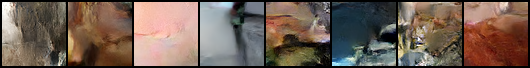

In [3]:
im_samples = model.uncond_sample(nhw_repeat=(8,1,1), temprature=1.0)
im = tv.utils.make_grid(im_samples, nrow=12)
tvf.to_pil_image(im)